# 2. Regression on the California Housing Dataset
### Assignment Task:
    - Use the California Housing dataset to predict housing prices based on various factors like population, median income, and latitude/longitude.
    - Implement a Random Forest Regressor and perform a full train-test split on the dataset.
    - Evaluate the model performance using Mean Squared Error (MSE) and R-squared metrics. Plot learning curves and discuss how well the model generalizes.
### Additional Challenges:
    - Compare Random Forest Regressor's performance with other models like Decision Tree Regressor and Gradient Boosting Regressor.
    - Discuss the impact of feature scaling on model performance.
### Dataset:
    - California Housing Dataset (Scikit-learn)

In [45]:
from sklearn.datasets import fetch_california_housing

In [46]:
# fetch dataset 
california_housing = fetch_california_housing()
  
# data (as pandas dataframes) 
X = california_housing.data 
y = california_housing.target

print(X.shape) 
print(y.shape)

(20640, 8)
(20640,)


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=10, random_state=42)

In [53]:
rf_regressor.fit(x_train_scaled, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [54]:
y_pred = rf_regressor.predict(x_test_scaled)

y_pred

array([0.5038  , 0.7125  , 4.900005, ..., 4.664608, 0.7293  , 1.6014  ])

In [55]:
from sklearn.metrics import mean_squared_error

print("Mean Squared Error:\n", mean_squared_error(y_test, y_pred))

Mean Squared Error:
 0.28364877522100695


In [56]:
from sklearn.metrics import r2_score

print("R2 Score:\n", r2_score(y_test, y_pred))

R2 Score:
 0.7835417950190033


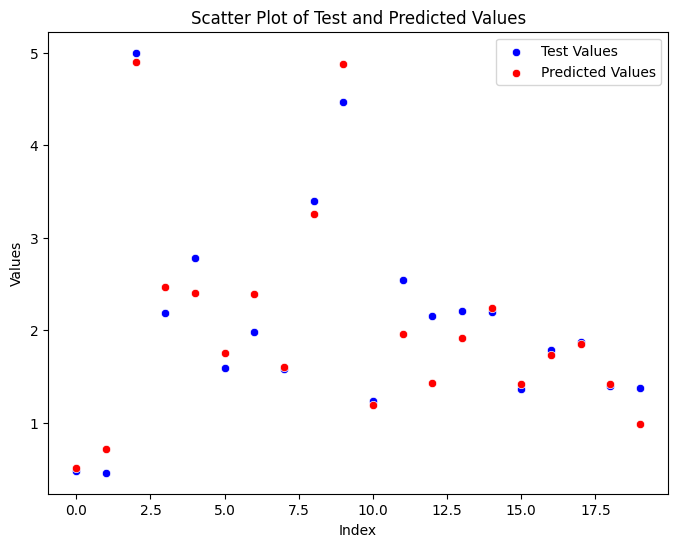

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with indices and values for both y_test and y_pred
df = pd.DataFrame({
    'Index': range(len(y_test[:20])),  # x-axis (index)
    'y_test': y_test[:20],             # y-axis (test values)
    'y_pred': y_pred[:20]              # y-axis (predicted values)
})

# Plot the scatter plot
plt.figure(figsize=(8,6))  # Set the figure size

# Scatter plot for y_test
sns.scatterplot(x='Index', y='y_test', data=df, color='blue', label='Test Values')

# Scatter plot for y_pred
sns.scatterplot(x='Index', y='y_pred', data=df, color='red', label='Predicted Values')

# Add legend
plt.legend()

# Add titles and labels
plt.title('Scatter Plot of Test and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')

# Show the plot
plt.show()

## Decision Tree Regressor

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
dt_model = DecisionTreeRegressor()

In [60]:
dt_model.fit(x_train_scaled, y_train)

DecisionTreeRegressor()

In [61]:
y_pred_dt = dt_model.predict(x_test_scaled)

In [62]:
print("Mean Squared Error:\n", mean_squared_error(y_test, y_pred_dt))

Mean Squared Error:
 0.49457472512991757


In [63]:
print("R2 Score:\n", r2_score(y_test, y_pred_dt))

R2 Score:
 0.6225798713666955


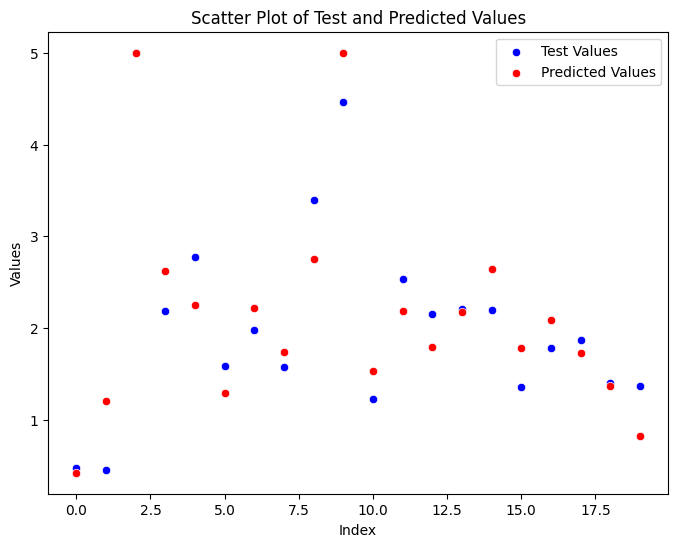

In [64]:
# Create a DataFrame with indices and values for both y_test and y_pred
df = pd.DataFrame({
    'Index': range(len(y_test[:20])),  # x-axis (index)
    'y_test': y_test[:20],             # y-axis (test values)
    'y_pred': y_pred_dt[:20]              # y-axis (predicted values)
})

# Plot the scatter plot
plt.figure(figsize=(8,6))  # Set the figure size

# Scatter plot for y_test
sns.scatterplot(x='Index', y='y_test', data=df, color='blue', label='Test Values')

# Scatter plot for y_pred
sns.scatterplot(x='Index', y='y_pred', data=df, color='red', label='Predicted Values')

# Add legend
plt.legend()

# Add titles and labels
plt.title('Scatter Plot of Test and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')

# Show the plot
plt.show()

## Gradient Boosting Regressor
    - reading pending